In [1]:
import pandas as pd
import numpy as np

import folium

import pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Juntar las dos tablas (datos con stats de torneos y datos con stats online)

In [2]:
stats_original = pd.read_csv(r'..\data\stats_chess_com.csv')
stats = stats_original.copy()
stats.head(20)

,Name,Country,Current_rapid_rating,Highest_rapid_rating,Rapid_win,Rapid_draw,Rapid_loss,Current_blitz_rating,Highest_blitz_rating,Blitz_win,Blitz_draw,Blitz_loss,Wins_online,Draws_online,Losses_online
0,"Engine, Komodo",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Plát, Vojtěch",Czech Republic,2383.0,2672.0,12.0,5.0,6.0,2823.0,2914.0,976.0,280.0,847.0,46.47,13.41,40.12
2,"Carlsen, PlayMagnus",Norway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Carlsen, Magnus",Norway,2925.0,2977.0,43.0,23.0,8.0,3287.0,3322.0,1402.0,292.0,334.0,68.74,14.99,16.27
4,"Caruana, Fabiano",United States,2794.0,3045.0,122.0,103.0,46.0,3125.0,3136.0,1012.0,194.0,322.0,63.04,16.51,20.46
5,"Shkuro, Iuri",Ukraine,2492.0,2566.0,179.0,4.0,9.0,2906.0,2906.0,977.0,219.0,505.0,61.07,11.78,27.15
6,"Nakamura, Hikaru",United States,2781.0,2927.0,156.0,157.0,39.0,3232.0,3332.0,24782.0,3307.0,4284.0,76.20,10.59,13.21
7,"Kasparov, Garry",Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Anand, Viswanathan",India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Aronian, Levon",United States,2781.0,2939.0,77.0,69.0,31.0,3051.0,3152.0,83.0,63.0,78.0,39.90,32.92,27.18


In [3]:
stats_live_tournaments_original = pd.read_csv(r'..\data\stats_live_tournaments.csv')
stats_live_tournaments = stats_live_tournaments_original.copy()
stats_live_tournaments.head()

,#,Name,Classic,Rapid,Blitz,Age,% Wins_lt,% Draws_lt,% Losses_lt
0,1,"Carlsen, Magnus",2838.4,2825.0,2887.0,32,48.53,35.27,16.20
1,2,"Caruana, Fabiano",2782.6,2767.4,2813.0,31,42.75,34.49,22.76
2,3,"Nakamura, Hikaru",2782.6,2744.8,2874.0,35,51.91,31.90,16.19
3,4,"Ding, Liren",2780.0,2830.0,2787 i,30,52.68,23.82,23.50
4,5,"Firouzja, Alireza",2777.0,2742.0,2896.0,20,40.26,39.02,20.72


In [4]:
GMs_stats = pd.merge(stats_live_tournaments, stats[['Name', 'Current_rapid_rating', 'Current_blitz_rating', 'Wins_online', 'Draws_online', 'Losses_online']], on='Name', how='left')
GMs_stats

,#,Name,Classic,Rapid,Blitz,Age,% Wins_lt,% Draws_lt,% Losses_lt,Current_rapid_rating,Current_blitz_rating,Wins_online,Draws_online,Losses_online
0,1,"Carlsen, Magnus",2838.4,2825.0,2887.0,32,48.53,35.27,16.20,2925.0,3287.0,68.74,14.99,16.27
1,2,"Caruana, Fabiano",2782.6,2767.4,2813.0,31,42.75,34.49,22.76,2794.0,3125.0,63.04,16.51,20.46
2,3,"Nakamura, Hikaru",2782.6,2744.8,2874.0,35,51.91,31.90,16.19,2781.0,3232.0,76.20,10.59,13.21
3,3,"Nakamura, Hikaru",2782.6,2744.8,2874.0,35,51.91,31.90,16.19,263.0,NaN,NaN,NaN,NaN
4,3,"Nakamura, Hikaru",2782.6,2744.8,2874.0,35,51.91,31.90,16.19,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,96,"Najer, Evgeniy",2648.0,2579.0,2545.0,46,43.18,34.52,22.30,2446.0,2842.0,50.18,8.95,40.87
112,97,"Saric, Ivan",2647.5,2631.0,2586.0,32,43.31,36.03,20.66,2712.0,2820.0,47.67,15.95,36.38
113,98,"Malakhov, Vladimir",2646.0,2666.0,2652.0,42,41.03,44.29,14.69,2556.0,NaN,NaN,NaN,NaN
114,99,"Liang, Awonder",2645.6,2518.4,2538.0,20,44.17,29.00,26.83,2600.0,3035.0,50.85,14.51,34.64


In [5]:
GMs_stats.Name.value_counts().head(12)

Mamedyarov, Shakhriyar    4
Nakamura, Hikaru          4
Anand, Viswanathan        3
Abasov, Nijat             2
Aronian, Levon            2
Shankland, Sam            2
Cheparinov, Ivan          2
Artemiev, Vladislav       2
Fedoseev, Vladimir        2
Giri, Anish               2
Robson, Ray               2
Ivanchuk, Vasyl           1
Name: Name, dtype: int64

In [6]:
GMs_stats= GMs_stats.drop_duplicates(subset=['Name'])
GMs_stats

,#,Name,Classic,Rapid,Blitz,Age,% Wins_lt,% Draws_lt,% Losses_lt,Current_rapid_rating,Current_blitz_rating,Wins_online,Draws_online,Losses_online
0,1,"Carlsen, Magnus",2838.4,2825.0,2887.0,32,48.53,35.27,16.20,2925.0,3287.0,68.74,14.99,16.27
1,2,"Caruana, Fabiano",2782.6,2767.4,2813.0,31,42.75,34.49,22.76,2794.0,3125.0,63.04,16.51,20.46
2,3,"Nakamura, Hikaru",2782.6,2744.8,2874.0,35,51.91,31.90,16.19,2781.0,3232.0,76.20,10.59,13.21
6,4,"Ding, Liren",2780.0,2830.0,2787 i,30,52.68,23.82,23.50,NaN,NaN,NaN,NaN,NaN
7,5,"Firouzja, Alireza",2777.0,2742.0,2896.0,20,40.26,39.02,20.72,2715.0,3100.0,53.71,12.68,33.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,96,"Najer, Evgeniy",2648.0,2579.0,2545.0,46,43.18,34.52,22.30,2446.0,2842.0,50.18,8.95,40.87
112,97,"Saric, Ivan",2647.5,2631.0,2586.0,32,43.31,36.03,20.66,2712.0,2820.0,47.67,15.95,36.38
113,98,"Malakhov, Vladimir",2646.0,2666.0,2652.0,42,41.03,44.29,14.69,2556.0,NaN,NaN,NaN,NaN
114,99,"Liang, Awonder",2645.6,2518.4,2538.0,20,44.17,29.00,26.83,2600.0,3035.0,50.85,14.51,34.64


In [7]:
GMs_stats = GMs_stats.reset_index(drop=True)
GMs_stats

,#,Name,Classic,Rapid,Blitz,Age,% Wins_lt,% Draws_lt,% Losses_lt,Current_rapid_rating,Current_blitz_rating,Wins_online,Draws_online,Losses_online
0,1,"Carlsen, Magnus",2838.4,2825.0,2887.0,32,48.53,35.27,16.20,2925.0,3287.0,68.74,14.99,16.27
1,2,"Caruana, Fabiano",2782.6,2767.4,2813.0,31,42.75,34.49,22.76,2794.0,3125.0,63.04,16.51,20.46
2,3,"Nakamura, Hikaru",2782.6,2744.8,2874.0,35,51.91,31.90,16.19,2781.0,3232.0,76.20,10.59,13.21
3,4,"Ding, Liren",2780.0,2830.0,2787 i,30,52.68,23.82,23.50,NaN,NaN,NaN,NaN,NaN
4,5,"Firouzja, Alireza",2777.0,2742.0,2896.0,20,40.26,39.02,20.72,2715.0,3100.0,53.71,12.68,33.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,"Najer, Evgeniy",2648.0,2579.0,2545.0,46,43.18,34.52,22.30,2446.0,2842.0,50.18,8.95,40.87
96,97,"Saric, Ivan",2647.5,2631.0,2586.0,32,43.31,36.03,20.66,2712.0,2820.0,47.67,15.95,36.38
97,98,"Malakhov, Vladimir",2646.0,2666.0,2652.0,42,41.03,44.29,14.69,2556.0,NaN,NaN,NaN,NaN
98,99,"Liang, Awonder",2645.6,2518.4,2538.0,20,44.17,29.00,26.83,2600.0,3035.0,50.85,14.51,34.64


In [8]:
GMs_stats.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #                     100 non-null    int64  
 1   Name                  100 non-null    object 
 2   Classic               100 non-null    float64
 3   Rapid                 100 non-null    object 
 4   Blitz                 100 non-null    object 
 5   Age                   100 non-null    int64  
 6   % Wins_lt             99 non-null     float64
 7   % Draws_lt            99 non-null     float64
 8   % Losses_lt           99 non-null     float64
 9   Current_rapid_rating  63 non-null     float64
 10  Current_blitz_rating  64 non-null     float64
 11  Wins_online           59 non-null     float64
 12  Draws_online          59 non-null     float64
 13  Losses_online         59 non-null     float64
dtypes: float64(9), int64(2), object(3)
memory usage: 28.1 KB


In [9]:
GM_muestra = GMs_stats.dropna()

In [10]:
GMs_stats = GMs_stats.to_csv(r'..\data\GMs_stats.csv', index=False)

In [11]:
GM_muestra = GM_muestra.reset_index(drop=True)
GM_muestra

,#,Name,Classic,Rapid,Blitz,Age,% Wins_lt,% Draws_lt,% Losses_lt,Current_rapid_rating,Current_blitz_rating,Wins_online,Draws_online,Losses_online
0,1,"Carlsen, Magnus",2838.4,2825.0,2887.0,32,48.53,35.27,16.20,2925.0,3287.0,68.74,14.99,16.27
1,2,"Caruana, Fabiano",2782.6,2767.4,2813.0,31,42.75,34.49,22.76,2794.0,3125.0,63.04,16.51,20.46
2,3,"Nakamura, Hikaru",2782.6,2744.8,2874.0,35,51.91,31.90,16.19,2781.0,3232.0,76.20,10.59,13.21
3,5,"Firouzja, Alireza",2777.0,2742.0,2896.0,20,40.26,39.02,20.72,2715.0,3100.0,53.71,12.68,33.61
4,6,"Nepomniachtchi, Ian",2774.8,2763.2,2785.0,33,40.26,39.02,20.72,2728.0,3084.0,55.04,14.39,30.58
5,7,"So, Wesley",2760.6,2783.2,2765.0,29,39.11,43.79,17.09,2856.0,3108.0,54.11,21.59,24.30
6,8,"Giri, Anish",2759.6,2696.2,2751.6,29,32.51,48.02,19.46,2686.0,3087.0,50.13,27.75,22.12
7,11,"Rapport, Richard",2752.0,2752.0,2748.0,27,41.14,37.00,21.86,2744.0,3033.0,54.13,14.51,31.36
8,12,"Karjakin, Sergey",2750.0,2729.0,2647 i,33,38.17,42.29,19.53,2735.0,3023.0,62.57,19.67,17.76
9,14,"Radjabov, Teimour",2745.0,2679.8,2707.0,36,29.01,53.40,17.59,2671.0,3020.0,66.50,17.77,15.74


In [12]:
GM_muestra.columns

Index(['#', 'Name', 'Classic', 'Rapid', 'Blitz', 'Age', '% Wins_lt',
       '% Draws_lt', '% Losses_lt', 'Current_rapid_rating',
       'Current_blitz_rating', 'Wins_online', 'Draws_online', 'Losses_online'],
      dtype='object')

In [13]:
# Definir la lista de valores a buscar
lista_valores = ['Ivanchuk, Vasyl', 'Leko, Peter']

# Filtrar y eliminar las filas que contengan la lista de valores
GM_muestra_filter = GM_muestra[~GM_muestra.isin(lista_valores).any(axis=1)]


<Figure size 1200x600 with 0 Axes>

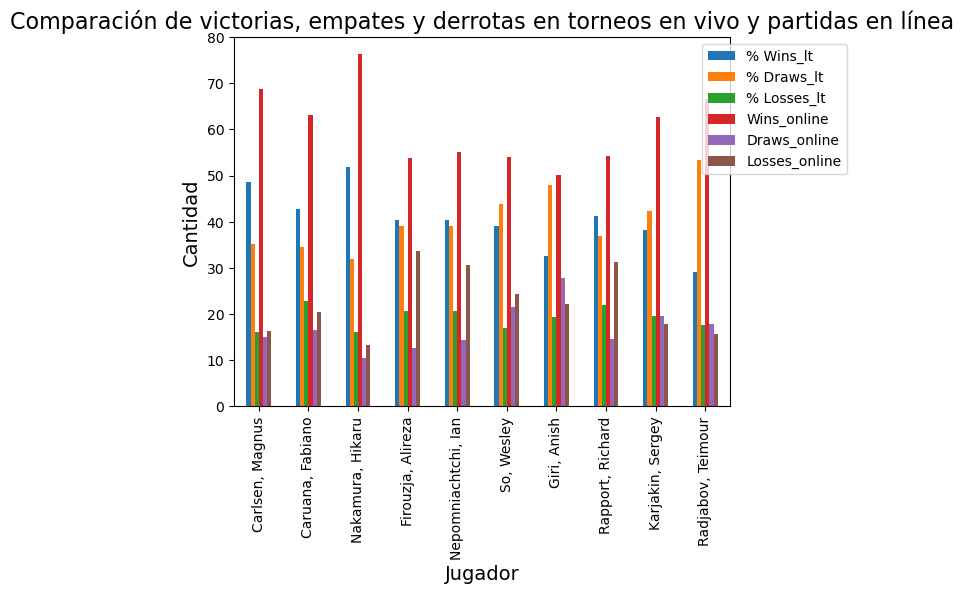

In [14]:
df_plot = GM_muestra[['Name', '% Wins_lt', '% Draws_lt', '% Losses_lt', 'Wins_online', 'Draws_online', 'Losses_online']]

# Establecer el nombre del jugador como índice
df_plot.set_index('Name', inplace=True)

df_top_10 = df_plot.head(10)

# Crear la visualización
plt.figure(figsize=(12, 6))
df_top_10.plot(kind='bar')
plt.title('Comparación de victorias, empates y derrotas en torneos en vivo y partidas en línea', fontsize=16)
plt.xlabel('Jugador', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))
plt.show()

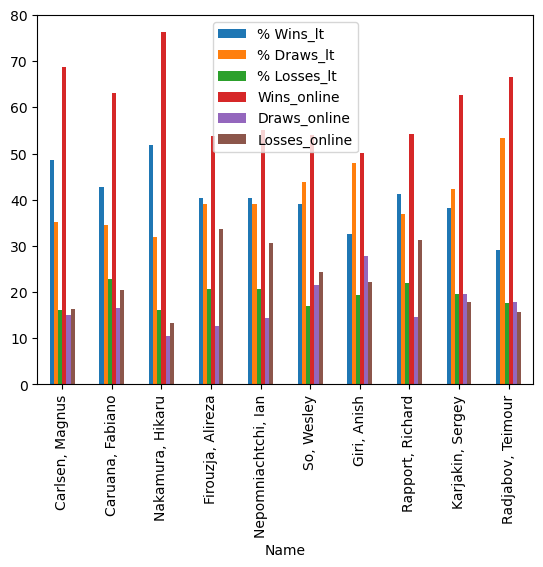

In [15]:
fig = df_top_10.plot(kind='bar').get_figure()
fig.savefig(r'..\images\live_vs_online.png')

In [16]:
# GM_muestra = GM_muestra.to_csv(r'GM_muestra.csv', index=False)

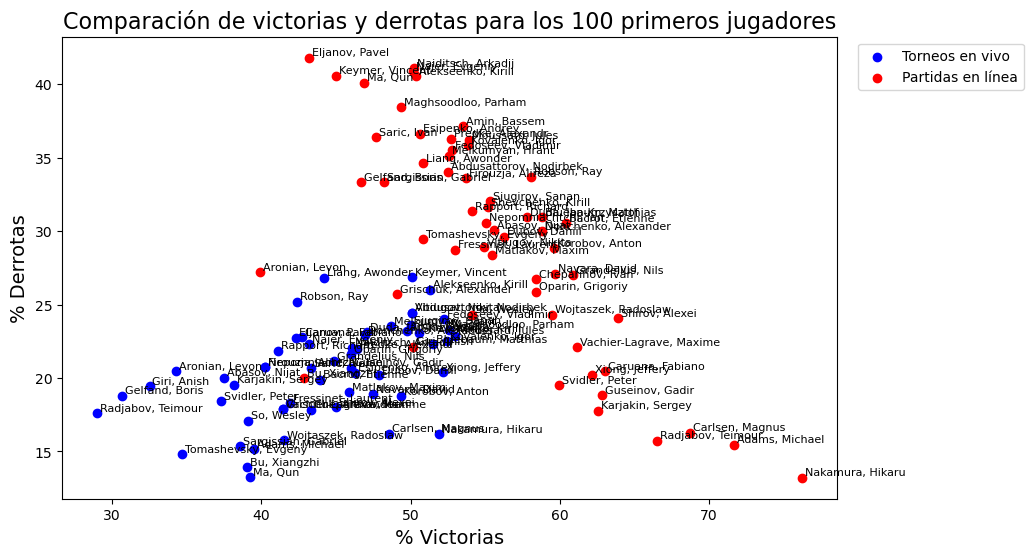

In [17]:
df_top_10 = GM_muestra_filter

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_top_10['% Wins_lt'], df_top_10['% Losses_lt'], color='blue', label='Torneos en vivo')
ax.scatter(df_top_10['Wins_online'], df_top_10['Losses_online'], color='red', label='Partidas en línea')

for i, row in df_top_10.iterrows():
    ax.text(row['% Wins_lt']+0.2, row['% Losses_lt'], row['Name'], ha='left', va='bottom', fontsize=8)
    ax.text(row['Wins_online']+0.2, row['Losses_online'], row['Name'], ha='left', va='bottom', fontsize=8)

plt.title('Comparación de victorias y derrotas para los 100 primeros jugadores', fontsize=16)
plt.xlabel('% Victorias', fontsize=14)
plt.ylabel('% Derrotas', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))

# Obtener la figura y guardarla en un archivo de imagen
fig = ax.get_figure()
fig.savefig(r'..\images\wins_vs_losess.png')

# Mostrar el gráfico
plt.show()